In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Mounting of google drive

Mounted at /content/drive


In [ ]:
#/content/drive/MyDrive/Machine learning/insurance.csv

In [ ]:
import pandas as pd  # For handling and analyzing structured data (CSV files, DataFrames)
import numpy as np   # For numerical operations like arrays, math functions

In [ ]:
db=pd.read_csv('/content/drive/MyDrive/Machine learning/insurance.csv')

In [ ]:
db.head(10)# viewing the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
db.shape

(1338, 7)

In [ ]:
# We need more interaction with these columns for better understanding and business conclusion

In [ ]:
db['bmi_category']=pd.cut(     #pd.cut divides data into intervals
    db['bmi'],# column name that will be divided
    bins=[0,18.5,25,30,100], # range 0-18.5 are underweight..so on..
    labels=['Underweight','Normal','Overweight','Obese']
)

In [ ]:
# Divide 'age' into meaningful age groups
db['age_group'] = pd.cut(db['age'],
                         bins=[17, 25, 35, 45, 55, 65],
                         labels=['Young Adult', 'Adults', 'Mid- aged', 'Elder', 'Early Seniors'])

In [ ]:
db.head(10)

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Adults
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Adults
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Adults
5,31,female,25.740,0,no,southeast,3756.62160,Overweight,Adults
6,46,female,33.440,1,no,southeast,8240.58960,Obese,Elder
7,37,female,27.740,3,no,northwest,7281.50560,Overweight,Mid- aged
8,37,male,29.830,2,no,northeast,6406.41070,Overweight,Mid- aged
9,60,female,25.840,0,no,northwest,28923.13692,Overweight,Early Seniors


In [ ]:
db.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_category', 'age_group'],
      dtype='object')

In [ ]:
db.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0
bmi_category,0
age_group,0


In [ ]:
db['age_bmi_interaction'] = db['age'] * db['bmi']
# Reason: Interaction between age and BMI captures combined effect.
# Example: A 55-year-old with high BMI is much riskier than a 25-year-old with same BMI.


In [ ]:
db.head(10)

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_group,age_bmi_interaction
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Young Adult,530.100
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Young Adult,607.860
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Adults,924.000
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Adults,749.265
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Adults,924.160
5,31,female,25.740,0,no,southeast,3756.62160,Overweight,Adults,797.940
6,46,female,33.440,1,no,southeast,8240.58960,Obese,Elder,1538.240
7,37,female,27.740,3,no,northwest,7281.50560,Overweight,Mid- aged,1026.380
8,37,male,29.830,2,no,northeast,6406.41070,Overweight,Mid- aged,1103.710
9,60,female,25.840,0,no,northwest,28923.13692,Overweight,Early Seniors,1550.400


In [ ]:

import matplotlib.pyplot as plt         # For visualizations
import seaborn as sns                   # For advanced visualizations

/tmp/ipython-input-1179590405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bmi_category', y='charges', data=db, palette='coolwarm')


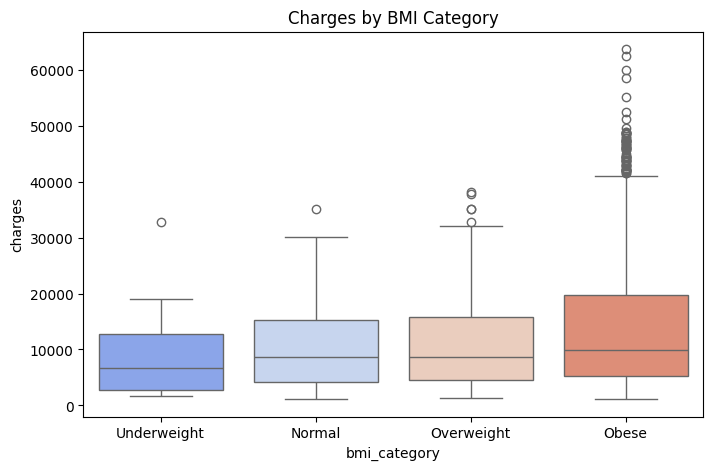

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='bmi_category', y='charges', data=db, palette='coolwarm')
plt.title('Charges by BMI Category')
plt.show()
# Insight: Boxplot shows how obese vs non-obese people differ in charges.

/tmp/ipython-input-1176574056.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='charges', data=db, estimator=np.mean, ci=None, palette='mako')
/tmp/ipython-input-1176574056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='charges', data=db, estimator=np.mean, ci=None, palette='mako')


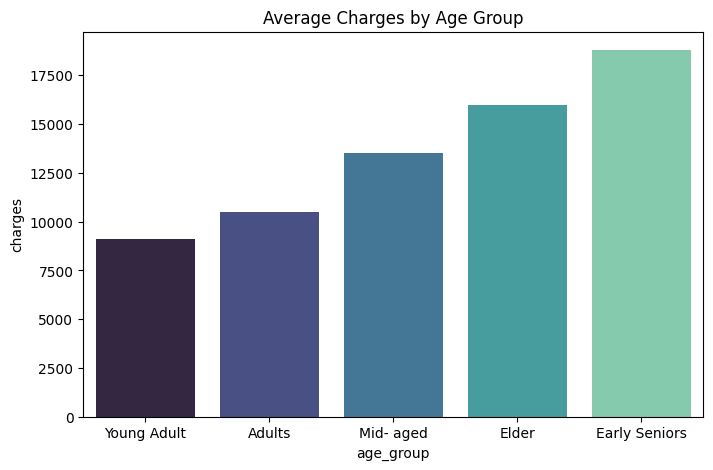

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='age_group', y='charges', data=db, estimator=np.mean, ci=None, palette='mako')
plt.title('Average Charges by Age Group')
plt.show()
# we disable the confidence interval because htey can male visualization clusttered
# Insight: Shows how average medical cost increases with age.

In [ ]:
db = pd.get_dummies(db, drop_first=True)#Use LabelEncoder for ordinal data (ordered categories)
#and get_dummies for nominal data (unordered categories).
#`drop_first=True` removes one dummy column to **avoid redundancy** and prevent fake correlations.
#we one hot encoded the data


In [ ]:
db.head(5)

,age,bmi,children,charges,age_bmi_interaction,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,age_group_Adults,age_group_Mid- aged,age_group_Elder,age_group_Early Seniors
0,19,27.900,0,16884.92400,530.100,False,True,False,False,True,False,True,False,False,False,False,False
1,18,33.770,1,1725.55230,607.860,True,False,False,True,False,False,False,True,False,False,False,False
2,28,33.000,3,4449.46200,924.000,True,False,False,True,False,False,False,True,True,False,False,False
3,33,22.705,0,21984.47061,749.265,True,False,True,False,False,True,False,False,True,False,False,False
4,32,28.880,0,3866.85520,924.160,True,False,True,False,False,False,True,False,True,False,False,False


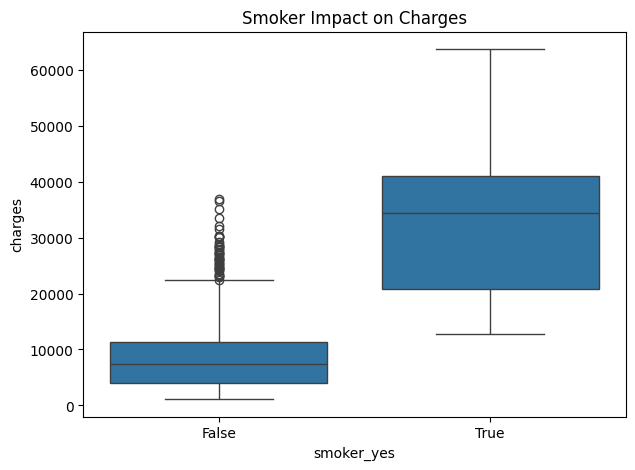

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='smoker_yes', y='charges', data=db)
plt.title('Smoker Impact on Charges')
plt.show()

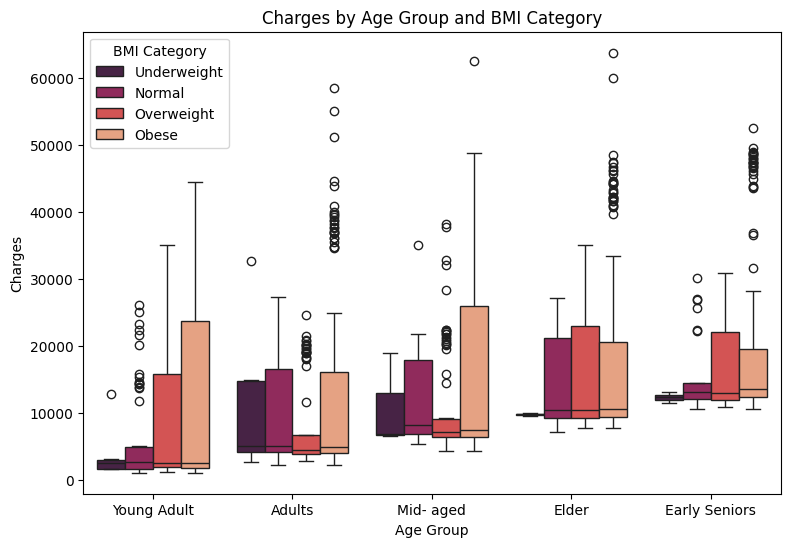

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x='age_group', y='charges', hue='bmi_category', data=db, palette='rocket')
plt.title('Charges by Age Group and BMI Category')
plt.xlabel('Age Group')
plt.ylabel('Charges')
plt.legend(title='BMI Category')
plt.show()

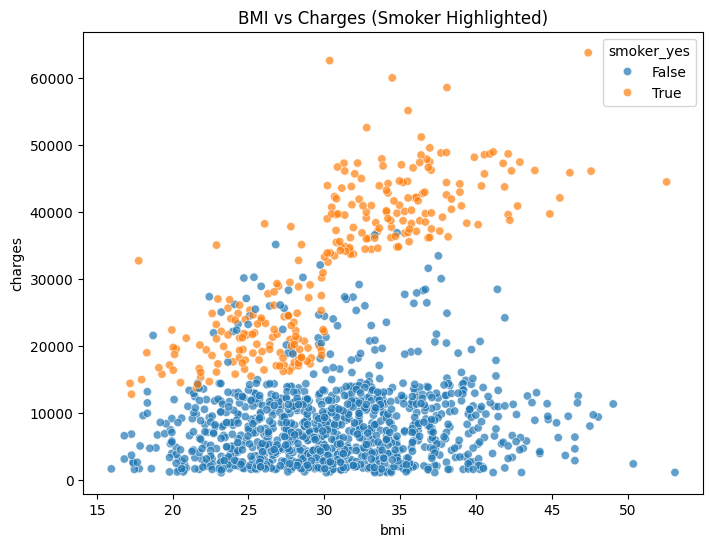

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='bmi', y='charges', hue='smoker_yes', data=db, alpha=0.7)
plt.title('BMI vs Charges (Smoker Highlighted)')
plt.show()

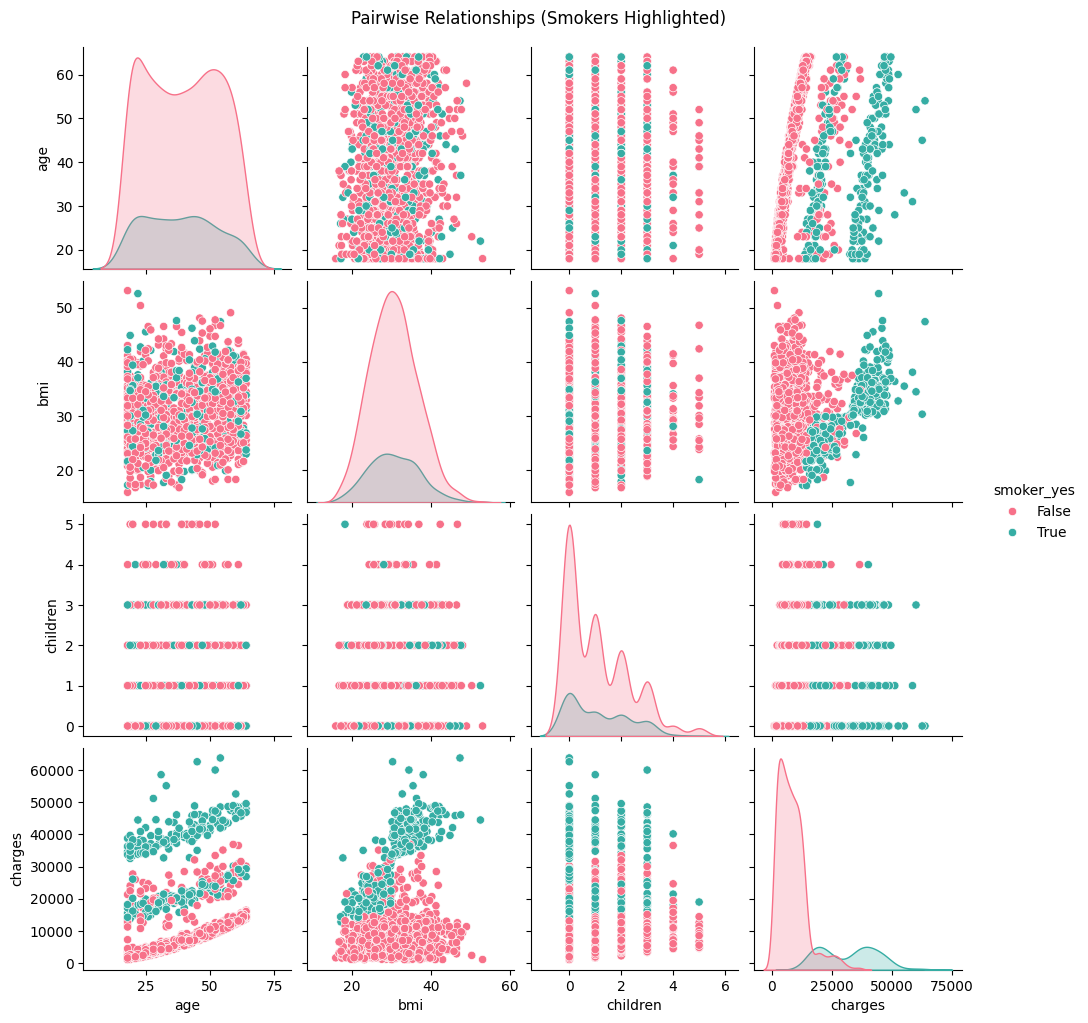

In [ ]:
# Shows how numerical features relate to each other and to 'charges'
sns.pairplot(db, vars=['age', 'bmi', 'children', 'charges'], hue='smoker_yes', palette='husl')
plt.suptitle('Pairwise Relationships (Smokers Highlighted)', y=1.02)
plt.show()


/tmp/ipython-input-510996672.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bmi_category', y='charges', hue='smoker_yes', data=db, estimator=np.mean, ci=None, palette='magma')


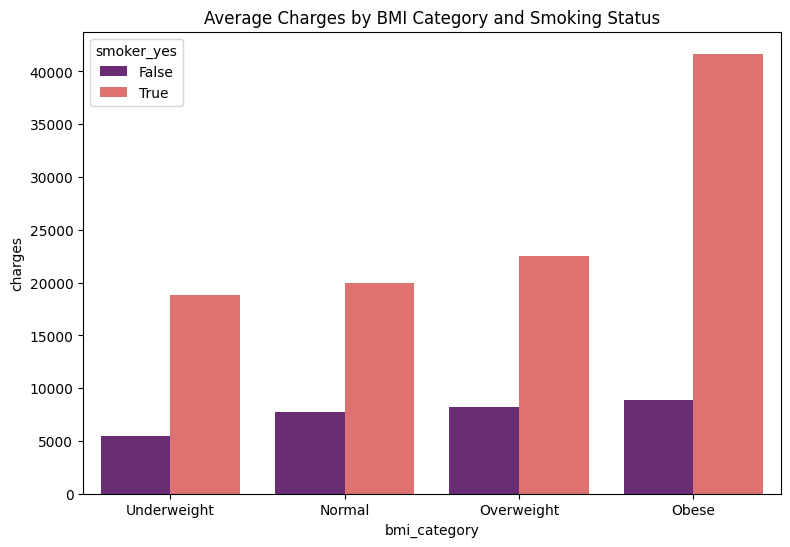

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(x='bmi_category', y='charges', hue='smoker_yes', data=db, estimator=np.mean, ci=None, palette='magma')
plt.title('Average Charges by BMI Category and Smoking Status')
plt.show()


In [ ]:
db.columns

Index(['age', 'bmi', 'children', 'charges', 'age_bmi_interaction', 'sex_male',
       'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Normal', 'bmi_category_Overweight',
       'bmi_category_Obese', 'age_group_Adults', 'age_group_Mid- aged',
       'age_group_Elder', 'age_group_Early Seniors', 'age_group',
       'bmi_category'],
      dtype='object')

In [ ]:
import plotly.express as px   # For interactive plots
import plotly.graph_objects as go

In [ ]:
# Convert encoded columns back to readable labels
# Region was one-hot encoded, so we rebuild it
def get_region(row):
    if row['region_northwest'] == 1:
        return 'Northwest'
    elif row['region_southeast'] == 1:
        return 'Southeast'
    elif row['region_southwest'] == 1:
        return 'Southwest'
    else:
        return 'Northeast'   # base category that was dropped

In [ ]:
db['region'] = db.apply(get_region, axis=1)   # apply the above function to every row


In [ ]:
# Convert smoker_yes (0 or 1) into “Yes” or “No”
db['smoker'] = db['smoker_yes'].apply(lambda x: 'Yes' if x == 1 else 'No')


In [ ]:
avg_charges = db.groupby(['region', 'smoker'])['charges'].mean().reset_index()
# groups data by region and smoker
#  calculates average charges for each group

In [ ]:
db.head(10)

,age,bmi,children,charges,age_bmi_interaction,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,...,bmi_category_Overweight,bmi_category_Obese,age_group_Adults,age_group_Mid- aged,age_group_Elder,age_group_Early Seniors,age_group,bmi_category,region,smoker
0,19,27.900,0,16884.92400,530.100,False,True,False,False,True,...,True,False,False,False,False,False,Young Adult,Overweight,Southwest,Yes
1,18,33.770,1,1725.55230,607.860,True,False,False,True,False,...,False,True,False,False,False,False,Young Adult,Obese,Southeast,No
2,28,33.000,3,4449.46200,924.000,True,False,False,True,False,...,False,True,True,False,False,False,Adults,Obese,Southeast,No
3,33,22.705,0,21984.47061,749.265,True,False,True,False,False,...,False,False,True,False,False,False,Adults,Normal,Northwest,No
4,32,28.880,0,3866.85520,924.160,True,False,True,False,False,...,True,False,True,False,False,False,Adults,Overweight,Northwest,No
5,31,25.740,0,3756.62160,797.940,False,False,False,True,False,...,True,False,True,False,False,False,Adults,Overweight,Southeast,No
6,46,33.440,1,8240.58960,1538.240,False,False,False,True,False,...,False,True,False,False,True,False,Elder,Obese,Southeast,No
7,37,27.740,3,7281.50560,1026.380,False,False,True,False,False,...,True,False,False,True,False,False,Mid- aged,Overweight,Northwest,No
8,37,29.830,2,6406.41070,1103.710,True,False,False,False,False,...,True,False,False,True,False,False,Mid- aged,Overweight,Northeast,No
9,60,25.840,0,28923.13692,1550.400,False,False,True,False,False,...,True,False,False,False,False,True,Early Seniors,Overweight,Northwest,No


In [ ]:
#interactive charts
fig = px.bar(
    avg_charges,#data that used for plotting this chart
    x='region',
    y='charges',
    color='smoker',
    barmode='group',#side by side columns for easier comparison
    title='Average Medical Charges by Region and Smoking Status'
)
fig.show()

In [ ]:
fig = px.scatter(
    db,
    x='age',
    y='charges',
    color='smoker',
    title='Age vs Medical Charges (Smokers vs Non-Smokers)',
    opacity=0.7
)
fig.show()

In [ ]:
avg_age = db.groupby('age')['charges'].mean().reset_index()

fig2 = px.line(
    avg_age,
    x='age',
    y='charges',
    title='Average Medical Charges by Age'
)
fig2.show()

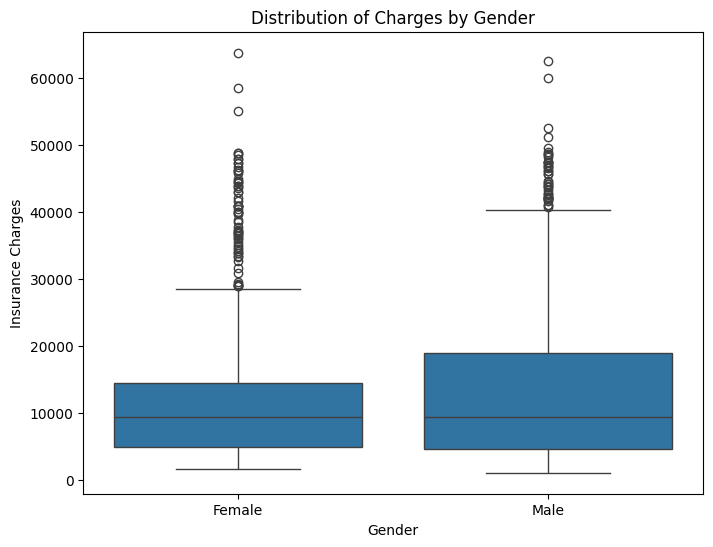

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='sex_male', y='charges', data=db)
plt.xticks([0,1], ['Female', 'Male'])
plt.title("Distribution of Charges by Gender")
plt.ylabel("Insurance Charges")
plt.xlabel("Gender")
plt.show()

In [ ]:
db.columns



Index(['age', 'bmi', 'children', 'charges', 'age_bmi_interaction', 'sex_male',
       'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Normal', 'bmi_category_Overweight',
       'bmi_category_Obese', 'age_group_Adults', 'age_group_Mid- aged',
       'age_group_Elder', 'age_group_Early Seniors', 'age_group',
       'bmi_category', 'region', 'smoker'],
      dtype='object')

In [ ]:
#libraries for model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
#Avoid 'region', 'smoker', 'age_group', 'bmi_category' (they are text) as we used them in numeric data below also
X = db[[
    'age', 'bmi', 'children', 'age_bmi_interaction', 'sex_male',
    'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese',
    'age_group_Adults', 'age_group_Mid- aged', 'age_group_Elder', 'age_group_Early Seniors'
]]

y = db['charges']   # Target variable we want to predict


In [ ]:
#splitting of data 80% train,20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
lr = LinearRegression()      # create Linear Regression model
lr.fit(X_train, y_train)     # train the model
y_pred_lr = lr.predict(X_test)  # predict test data

In [ ]:
#Model Evaluation
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Linear Regression → R2:", round(r2_lr,3), "MAE:", round(mae_lr,2), "MSE:", round(mse_lr,2))

Linear Regression → R2: 0.782 MAE: 4284.66 MSE: 33905990.67


In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,   # number of trees
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest → R2:", round(r2_rf,3), "MAE:", round(mae_rf,2), "MSE:", round(mse_rf,2))

Random Forest → R2: 0.872 MAE: 2419.96 MSE: 19901222.26


In [ ]:
xgb = XGBRegressor(
    n_estimators=300,     # number of trees
    learning_rate=0.1,    # step size for boosting
    max_depth=5,          # depth of each tree
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print("XGBoost → R2:", round(r2_xgb,3), "MAE:", round(mae_xgb,2), "MSE:", round(mse_xgb,2))
#  XGBoost uses boosting — it builds trees sequentially to fix previous errors, giving very high accuracy.

XGBoost → R2: 0.866 MAE: 2580.88 MSE: 20747666.3


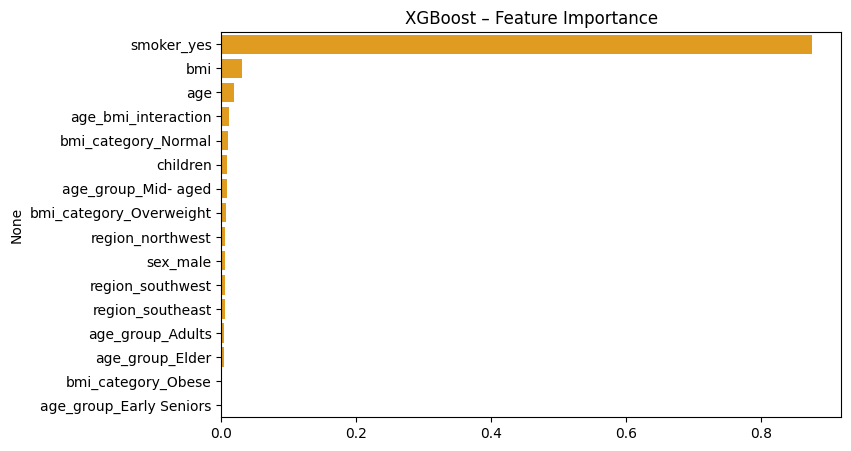

In [ ]:
xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=xgb_importances.values, y=xgb_importances.index, color='orange')
plt.title('XGBoost – Feature Importance')
plt.show()

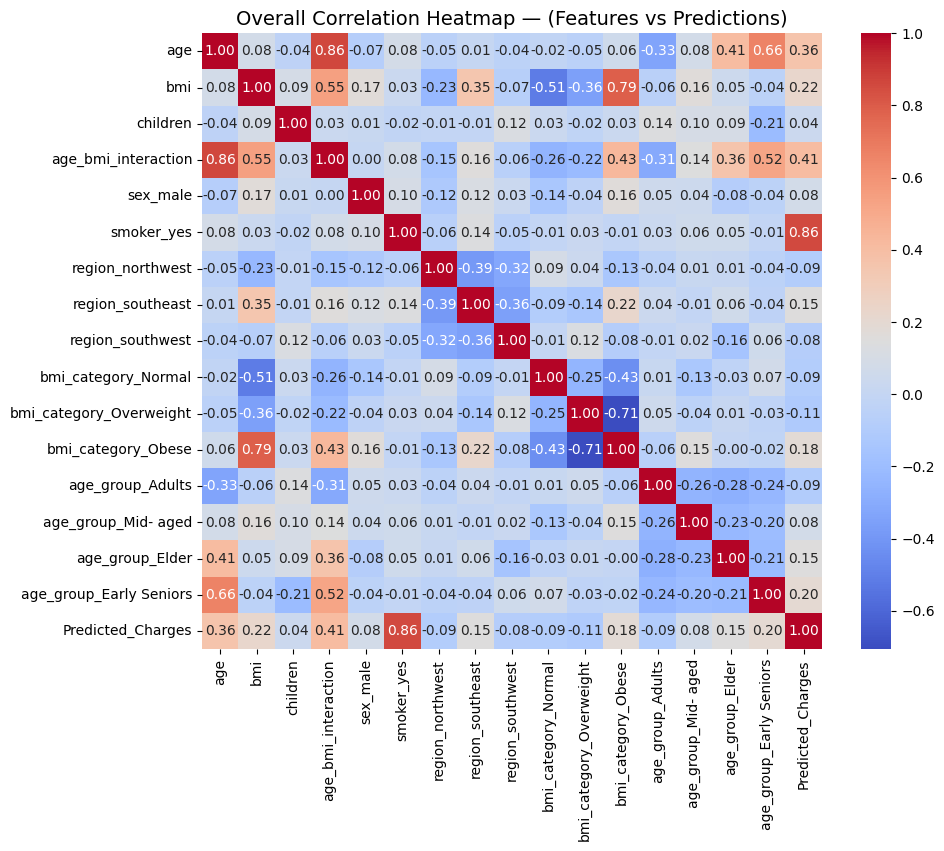

In [ ]:
# Make predictions using trained XGBoost model
y_pred_xgb = xgb.predict(X_test)
#Create a DataFrame combining features and predictions
corr_db = pd.DataFrame(X_test, columns=X.columns)
corr_db['Predicted_Charges'] = y_pred_xgb
#Compute correlation matrix
corr_matrix = corr_db.corr()
#Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Overall Correlation Heatmap — (Features vs Predictions)", fontsize=14)
plt.show()


In [ ]:
import joblib
joblib.dump(xgb, 'Insurance_model.pkl')

['Insurance_model.pkl']

In [ ]:

# Load your trained model
xgb= joblib.load("Insurance_model.pkl")
